In [ ]:
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"9b96c159fa16373c9cd4582b1c761212"}

def get_json(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [ ]:
simulation_dictionary = get(baseUrl)
names = [sim['name'] for sim in simulation_dictionary['simulations']]
i = names.index('Illustris-3')
sim = get(simulation_dictionary['simulations'][i]['url'])
snaps = get( sim['snapshots'] )
print(len(snaps))
snap = get( snaps[-1]['url'] )
subs = get( snap['subhalos'] )

sub = get(subs['results'][1]['url'])
print(sub.keys())

In [ ]:
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

import h5py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sub_prog_url = "http://www.tng-project.org/api/Illustris-3/snapshots/85/subhalos/185/"
sub_prog = get(sub_prog_url)
print(sub_prog.keys())
print(sub_prog_url+"id/info.json")



In [ ]:
cutout_request = {'gas':'Coordinates,Masses,Velocities'}
cutout = get(sub_prog_url+"cutout.hdf5", cutout_request)
full_catout = get(sub_prog_url + "cutout.hdf5")
#f = h5py.File(cutout,'r')
#print(f['PartType0'].keys())
ff = h5py.File(full_catout,'r')
print(ff['PartType0'].keys())

In [ ]:
x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
z = f['PartType0']['Coordinates'][:,2] - sub_prog['pos_z']
x_vel = f['PartType0']['Velocities'][:,0] - sub_prog['vel_x']
y_vel = f['PartType0']['Velocities'][:,1] - sub_prog['vel_y']
z_vel = f['PartType0']['Velocities'][:,2] - sub_prog['vel_z']
dens = np.log10(f['PartType0']['Masses'][:])

In [ ]:
print(x_vel[:10])

In [ ]:
print(x.shape, y.shape, z.shape)
import plotly.express as px
import pandas as pd
df = pd.DataFrame(np.column_stack((x,y,z,dens)), columns=['x','y','z','dens'])

In [ ]:
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='dens',
              )
fig.show()

In [ ]:
from martini.sources import TNGSource
from martini import DataCube, Martini
from martini.beams import GaussianBeam
from martini.noise import GaussianNoise
from martini.spectral_models import GaussianSpectrum
from martini.sph_kernels import AdaptiveKernel, GaussianKernel, CubicSplineKernel, DiracDeltaKernel
import astropy.units as U

In [ ]:
from illustris_python.groupcat import loadSingle, loadHeader
from illustris_python.snapshot import loadSubset, getSnapOffsets, snapPath
from Hdecompose.atomic_frac import atomic_frac
basePath = '/Users/michele/Documents/GitHub/TNGDownloader/TNG100-1/output'
snapNum = 99
data_header = loadHeader(basePath, snapNum)
print(data_header.keys())
data_sub = loadSingle(basePath, snapNum, subhaloID=0)
print(data_sub.keys())
haloID = data_sub['SubhaloGrNr']
fields_g = ('Masses', 'Velocities', 'InternalEnergy',
                    'ElectronAbundance', 'Density')
subset_g = getSnapOffsets(basePath, snapNum, haloID, "Group")
print(subset_g.keys())
data_g = loadSubset(basePath, snapNum, partType='gas', fields=fields_g)

In [ ]:
import h5py
from os.path import isfile
import os
myBasePath = '/Users/michele/Documents/GitHub/TNGDownloader/TNG100-1/output/'
snapNum= 99
def snapPath(basePath, snapNum, chunkNum=0):
    """ Return absolute path to a snapshot HDF5 file (modify as needed). """
    snapPath = basePath + '/snapdir_' + str(snapNum).zfill(3) + '/'
    filePath1 = snapPath + 'snap_' + str(snapNum).zfill(3) + '.' + str(chunkNum) + '.hdf5'
    print(filePath1)
    filePath2 = filePath1.replace('/snap_', '/snapshot_')
    print(isfile(filePath1), isfile(filePath2))
    print(os.path.exists(filePath1))
    if os.path.exists(filePath1):
        return filePath1
    return filePath2
snapPath(basePath, snapNum)

In [4]:
path = '/Users/michele/Documents/GitHub/TNGDownloader/TNG100-1/output/snapdir_099/text.txt'
path2 = '/Users/michele/Documents/GitHub/TNGDownloader/TNG100-1/output/groups_099/groups_099.0.hdf5'
print(os.path.exists(path), os.path.exists(path2))
import h5py

f = h5py.File(path2)
header = dict(f['Header'].attrs)
print(header.keys())

False True
dict_keys(['BoxSize', 'FileOffsets_Group', 'FileOffsets_Snap', 'FileOffsets_SubLink', 'FileOffsets_Subhalo', 'Ngroups_ThisFile', 'Ngroups_Total', 'Nsubgroups_ThisFile', 'Nsubgroups_Total', 'NumFiles', 'Num_ThisFile', 'Redshift', 'SimulationName', 'SnapshotNumber', 'Time'])


In [4]:
from martini.sources import TNGSource
from martini import DataCube, Martini
from martini.beams import GaussianBeam
from martini.noise import GaussianNoise
from martini.spectral_models import GaussianSpectrum
from martini.sph_kernels import AdaptiveKernel, GaussianKernel, CubicSplineKernel, DiracDeltaKernel
import astropy.units as U
%load_ext autoreload
%autoreload 2

myBasePath = '/Users/michele/Documents/GitHub/TNGDownloader/TNG100-1/output/'
mySnap = 99
myId = 67740 // 2
myId = 385350  # first central with 218 < Vmax < 220, and SFR > 1
source = TNGSource(
    myBasePath,
    mySnap,
    myId,
    distance=30 * U.Mpc,
    rotation={'L_coords': (60 * U.deg, 0. * U.deg)},
    ra=0. * U.deg,
    dec=0. * U.deg
)

datacube = DataCube(
    n_px_x=128,
    n_px_y=128,
    n_channels=64,
    px_size=10. * U.arcsec,
    channel_width=40. * U.km * U.s ** -1,
    velocity_centre=source.vsys,
    ra=source.ra,
    dec=source.dec
)

noise = GaussianNoise(
    rms=2.E-6 * U.Jy * U.arcsec ** -2
)

spectral_model = GaussianSpectrum(
    sigma='thermal'
)

beam = GaussianBeam(
    bmaj=30. * U.arcsec,
    bmin=30. * U.arcsec,
    bpa=0. * U.deg,
    truncate=3.
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/michele/Documents/GitHub/TNGDownloader/TNG100-1/output//groups_099/fof_subhalo_tab_099.0.hdf5


KeyError: 'SubhaloGrNr'

In [8]:
sph_kernel = GaussianKernel.mimic(
        CubicSplineKernel(rescale_sph_h=.5),
        truncate=3
    )

M = Martini(
        source=source,
        datacube=datacube,
        beam=beam,
        noise=noise,
        spectral_model=spectral_model,
        sph_kernel=sph_kernel
    )

Median smoothing length:  2.491611232074285 pix px
Minimum smoothing length:  0.5172633304078337 pix px
Maximum smoothing length:  3.2053060219111775 pix px
Smoothing length histogram (np.histogram): (array([    22,     28,     31,     16,     45,   4339,  73332, 146650,
        38573,   1143]), <Quantity [0.51726333, 0.7860676 , 1.05487187, 1.32367614, 1.59248041,
           1.86128468, 2.13008895, 2.39889321, 2.66769748, 2.93650175,
           3.20530602] pix>)
66 / 264179 smoothing lengths fail validation.
(3, 264179)
(264179,)


RuntimeError: No source particles in target region.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.utils import data
from astropy.io import fits  # We use fits to open the actual data file
from astropy.wcs import WCS
from spectral_cube import SpectralCube
from mayavi import mlab
import mayavi
from mayavi.api import Engine
import ffmpeg
from PIL import Image
import os
from natsort import natsorted
import torch
from torchvision.ops import box_iou

def load_fits(inFile):
    hdu_list = fits.open(inFile)
    data = hdu_list[0].data
    hdu_list.close()
    return data


cube = load_fits('testcube.fits')
print(cube.shape)

(1, 32, 128, 128)


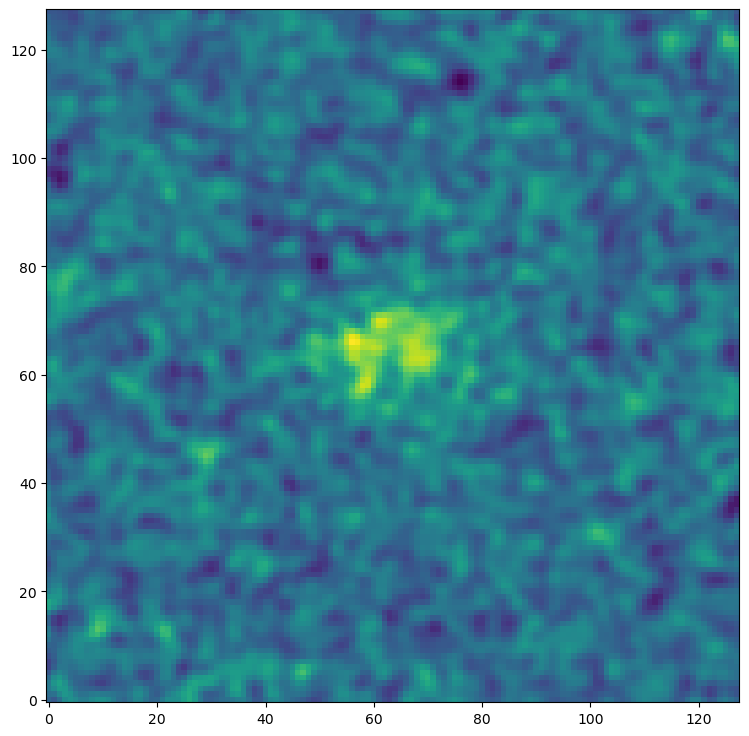

In [2]:
plt.figure(figsize=(9, 9))
plt.imshow(np.log10(np.sum(cube[0], axis=0) + np.min(np.sum(cube[0]))), origin='lower', cmap='viridis')
plt.show()